Problem Categories: 36
Mean Squared Error on Test Data: 8164.144173628732


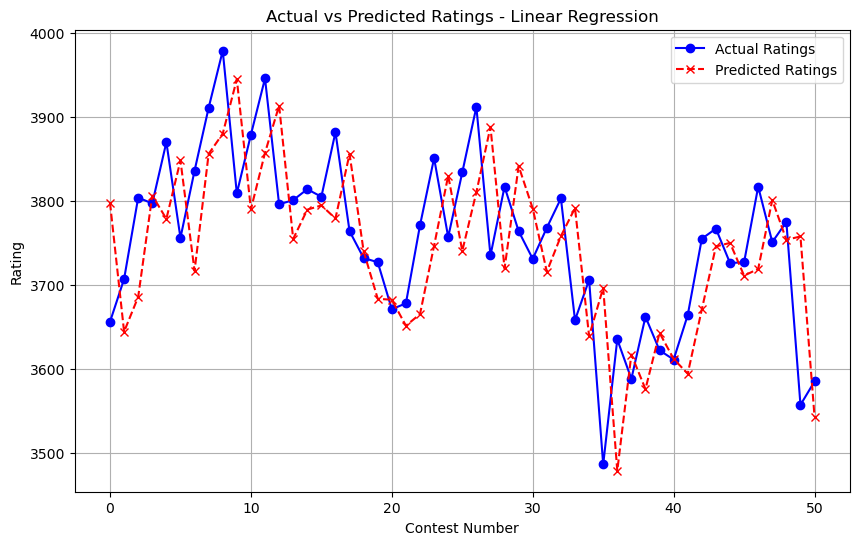

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('tourist_problem.csv')

# Extract unique problem tags
all_tags = '; '.join(data['Problem Tags'])
tags_split = [tag.strip() for sublist in all_tags.split(';') for tag in sublist.split(',') if tag.strip()]
unique_tags = list(set(tags_split))  # Convert set to list
print(f"Problem Categories: {len(unique_tags)}")

# Create a DataFrame for one-hot encoded tags
tags_encoded = pd.DataFrame(0, index=np.arange(len(data)), columns=unique_tags)
for i, tags in enumerate(data['Problem Tags']):
    for tag in tags.split(';'):
        tag = tag.strip()
        if tag in tags_encoded.columns:
            tags_encoded.at[i, tag] = 1

# Combine the one-hot encoded tags with 'Old Rating' and 'Contest Duration'
X = pd.concat([data[['Old Rating', 'Contest Duration']], tags_encoded], axis=1)
y = data['New Rating']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Ratings', color='blue', marker='o')
plt.plot(np.arange(len(y_test)), y_test_pred, label='Predicted Ratings', color='red', linestyle='dashed', marker='x')
plt.title('Actual vs Predicted Ratings - Linear Regression')
plt.xlabel('Contest Number')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig('actual_vs_predicted_ratings_linear_regression.png', dpi=1200)  # Adjust the file name and dpi as needed
plt.savefig('actual_vs_predicted_ratings_linear_regression.pdf', dpi=1200)  # Adjust the file name and dpi as needed
plt.show()
